In [1]:
import os

In [2]:
%pwd

'd:\\pp\\Price-Analysis-DataScience\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'd:\\pp\\Price-Analysis-DataScience'

In [5]:
import pandas as pd
df = pd.read_csv("artifacts/data_ingestion/car_prices.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


## EDA

In [7]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [8]:
df.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

In [9]:
df = df.drop(columns=["vin"])

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(472325, 15)

In [12]:
Year = df['year'].value_counts()

In [13]:
! pip install plotly --upgrade

   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   - -------------------------------------- 0.6/15.7 MB 18.5 MB/s eta 0:00:01
   - -------------------------------------- 0.8/15.7 MB 9.7 MB/s eta 0:00:02
   -- ------------------------------------- 0.9/15.7 MB 7.5 MB/s eta 0:00:02
   -- ------------------------------------- 1.1/15.7 MB 6.5 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/15.7 MB 5.9 MB/s eta 0:00:03
   --- ------------------------------------ 1.5/15.7 MB 5.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.7/15.7 MB 5.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/15.7 MB 5.1 MB/s eta 0:00:03
   ----- ---------------------------------- 2.0/15.7 MB 5.0 MB/s eta 0:00:03
   ----- ---------------------------------- 2.2/15.7 MB 4.8 MB/s eta 0:00:03
   ------ --------------------------------- 2.4/15.7 MB 4.8 MB/s eta 0:00:03
   ------ --------------------------------- 2.6/15.7 MB 4.7 MB/s eta 0:00:03
   --

In [14]:
!pip install chart_studio

In [15]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [18]:
px.bar(Year, x=Year.index, y=Year.values, title="Number of cars per year")

In [19]:
MODEL_LABEL = df['model'].values

In [20]:
MODEL_counts = df['model'].value_counts()
MODEL_count = MODEL_counts[MODEL_counts > 10000]
MODEL_count

model
Altima    16346
Fusion    12116
F-150     11950
Camry     10986
Escape    10656
Name: count, dtype: int64

In [21]:
import plotly.graph_objects as go


In [22]:
label = MODEL_count.index.to_list()

In [23]:

# Create a pie chart figure
fig = go.Figure(data=[go.Pie(labels=label, values=MODEL_count)])
# Set title
fig.update_layout(title_text='Distribution of Car Models')
# Show the plot
fig.show()

In [24]:
df.head()

year   make                model        trim   body transmission state  \
0  2015    Kia              Sorento          LX    SUV    automatic    ca   
1  2015    Kia              Sorento          LX    SUV    automatic    ca   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic    ca   
3  2015  Volvo                  S60          T5  Sedan    automatic    ca   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic    ca   

   condition  odometer  color interior  \
0        5.0   16639.0  white    black   
1        5.0    9393.0  white    beige   
2       45.0    1331.0   gray    black   
3       41.0   14282.0  white    black   
4       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

In [26]:
df.groupby('model')['sellingprice'].mean().sort_values(ascending=False)

model
458 Italia        183000.000000
SLS AMG GT        156500.000000
i8                154222.222222
Ghost             153456.250000
California        131846.153846
                      ...      
Tempo                333.333333
Tracer               312.500000
Spirit               300.000000
Windstar Cargo       258.333333
Paseo                150.000000
Name: sellingprice, Length: 768, dtype: float64

In [27]:
modelcost = df.groupby('model')['sellingprice'].mean().sort_values(ascending=False)

In [28]:
px.bar(modelcost, x=modelcost.index, y=modelcost.values, title="Average selling price per model")

In [29]:
TRIM = df.trim.value_counts()

In [30]:
TRIM = TRIM[TRIM > 10]
TRIM

trim
Base                  48779
SE                    39633
LX                    18706
Limited               15506
LT                    15273
                      ...  
VR6                      11
SR FFV                   11
Outback Limited          11
2.0T SportCombi          11
1.8T Avant quattro       11
Name: count, Length: 966, dtype: int64

In [31]:
px.bar(TRIM,title= "Distribution of TRIM all cars", color_discrete_sequence=["red"])

In [32]:
TTM = pd.crosstab(df.trim,df["make"])

In [33]:
px.line(TTM,title= "Distribution of TTM all cars")


In [34]:
BODY = df['body'].value_counts()

In [35]:
px.bar(BODY,title= "Distribution of BODY all cars")

In [36]:
transmission_counts= df['transmission'].value_counts()
transmission_counts

transmission
automatic    455963
manual        16362
Name: count, dtype: int64

In [37]:
px.bar(transmission_counts,title= "Distribution of BODY all cars")

In [38]:
pd.crosstab(df["trim"],df["transmission"])

transmission       automatic  manual
trim                                
!                        361      38
(1999.5) XE                4       1
+                       1389      22
1                         34      10
1.6                       18       6
...                      ...     ...
xDrive35d                231       0
xDrive35i                523       0
xDrive35i Premium        244       0
xDrive48i                 48       0
xDrive50i                244       0

[1494 rows x 2 columns]

In [42]:
for i in df.iterrows():
    if i[1]["trim"] == "!":
        print(i)
   

(2261, year                                               2011
make                                                Kia
model                                              Soul
trim                                                  !
body                                              Wagon
transmission                                  automatic
state                                                ca
condition                                          42.0
odometer                                        52846.0
color                                             green
interior                                          black
seller                               kia motors finance
mmr                                              9275.0
sellingprice                                    11000.0
saledate        Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
Name: 2261, dtype: object)
(2342, year                                               2011
make                                                Kia
model  

In [39]:
YT = pd.crosstab(df["year"],df["transmission"])

In [40]:
px.line(YT,title= "Distribution of SY all cars")

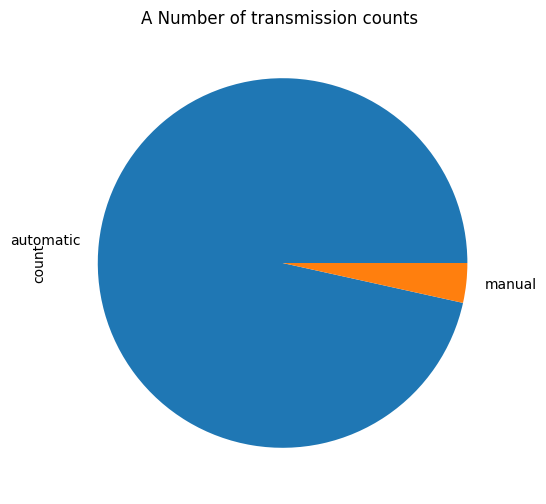

In [43]:
plt.figure(figsize=(8, 6))
transmission_counts.plot(kind='pie')
plt.title('A Number of transmission counts ')
plt.show()

In [44]:
df['profit_or_loss'] = df['mmr'] - df['sellingprice']
df['profit_or_loss'].describe()

count    472325.000000
mean        146.546905
std        1741.175011
min     -207200.000000
25%        -650.000000
50%          50.000000
75%         800.000000
max       87750.000000
Name: profit_or_loss, dtype: float64

In [45]:
PL = df['profit_or_loss'].value_counts()

In [46]:
px.line(PL,title= "Distribution of profit or loss all cars")

In [53]:
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class DataValidationConfig:
    root_dir: Path
    STATUS_FILE : str
    unzip_data_dir: Path
    all_schema : dict

In [54]:
from src.price_prediction.constants import *

from price_prediction.utils.common import read_yaml,create_directories

In [55]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])


    
    def get_data_validation_config(self) -> DataValidationConfig:
        config = self.config.data_validation
        schema = self.schema.COLUMNS

        create_directories([config.root_dir])

        data_validation_config = DataValidationConfig(
            root_dir=config.root_dir,
            STATUS_FILE=config.STATUS_FILE,
            unzip_data_dir = config.unzip_data_dir,
            all_schema=schema,
        )

        return data_validation_config

In [57]:
import os
from price_prediction import logger

In [58]:
class DataValiadtion:
    def __init__(self, config: DataValidationConfig):
        self.config = config


    def validate_all_columns(self)-> bool:
        try:
            validation_status = None

            data = pd.read_csv(self.config.unzip_data_dir)
            all_cols = list(data.columns)

            all_schema = self.config.all_schema.keys()

            
            for col in all_cols:
                if col not in all_schema:
                    validation_status = False
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")
                else:
                    validation_status = True
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")

            return validation_status
        
        except Exception as e:
            raise e



In [59]:
try:
    config = ConfigurationManager()
    data_validation_config = config.get_data_validation_config()
    data_validation = DataValiadtion(config=data_validation_config)
    data_validation.validate_all_columns()
except Exception as e:
    raise e

[2024-04-09 23:30:06,260: INFO: common: yaml file: config\config.yaml loaded successfully]
[2024-04-09 23:30:06,285: INFO: common: yaml file: params.yaml loaded successfully]
[2024-04-09 23:30:06,301: INFO: common: yaml file: schema.yaml loaded successfully]
[2024-04-09 23:30:06,306: INFO: common: created directory at: artificats]
[2024-04-09 23:30:06,309: INFO: common: created directory at: artifacts/data_validation]


: 